# II. HÁZI FELADAT

Ezt a feladatsort tetszőleges programozási nyelven meg lehet oldani, de a forráskódot minden esetben mellékelni kell. A python és octave megoldások programkódja kerülhet a jupyter notebookba. A programok legyenek modulárisak, használjanak függvényeket! A kimeneti adatok ábrázolásához minden esetben használjuk a jupyter notebookot! Az ábrák legyenek áttekinthetőek, és szerepeljen rajtuk tengelyfelirat!

# Oszcillátorok numerikus vizsgálata

$$ \def\dd{{\textrm{d}}} $$

Oszcillátoroknak olyan dinamikai rendszereket nevezünk, melyek mozgása az idő periodikus vagy kvázi-periodikus függvényeként írható le. Az egydimenziós oszcillátor mozgásegyenlete

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} $$

alakban írható. Egy szabad oszcillátor teljes energiája mindaddig megmarad, amíg a rendszerben nem hat súrlódási erő (csillapított oszcillátor), illetve nem hatunk rá külső erővel (gerjesztett oszcillátor). Az oszcillátor teljes energiája a kinetikus és a potenciális energia összege, azaz

$$ E_{\textrm{tot}} = \frac{m v^2}{2} + V(x)$$

## Harmonikus oszcillátor

Amennyiben a $V(x)$ potenciál négyzetes, abban az esetben harmonikus oszcillátorról beszélünk:

$$\begin{eqnarray}
    V(x) & = & \frac{1}{2}kx^2 \\
    m \frac{\dd^2x}{\dd t^2} & = & - k x.
\end{eqnarray}$$

A harmonikus oszcillátor mozgásegyenlete analitikusan is megoldható. A megoldás

$$ x(t) = A \cos( \omega t + \phi ) $$

alakú, ahol $A$ az amplitúdó - vagyis a legnagyobb kitérés -, $\omega$ a körfrekvencia és $\phi$ a kezdőfázis $t = 0$-ban. A harmonikus oszcillátor körfrekvenciáját a potenciálban szereplő $k$ állandó és az $m$ tömeg jellgű mennyiség határozza meg:

$$ \omega = \sqrt{\frac{k}{m}} = \frac{2\pi}{T}, $$

ahol $T$ a pediódusidő, melyből $f = 1/T$ módon kaphatjuk meg a frekvenciát.

## Anharmonikus oszcillátor

Az anharmonikus abban különböznek a harmonikus oszcillátortól, hogy a mozgásukat meghatározó potenciál nem négyzetes alakú. Néhány lehetséges anharmonikus potenciál:

* Negyedrendű potenciál

$$ V(x) = \frac{1}{4}kx^4 $$

* Lennard-Jones potenciál

$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$

## Csillapított és gerjesztett oszcillátor

A csillapított és/vagy gerjesztett oszcillátorok mozgásegyenletében megjelenik egy sebességtől függő és egy további, többnyire időfüggő külső erőtag is:

$$ m \frac{\dd^2x}{\dd t^2} = - \frac{\dd V(x)}{\dd x} - c \frac{\dd x}{\dd t} + F(t) $$

Csillapított és szinuszosan gerjesztett oszcillátorok viselkedése analitikusan is egyszerűen vizsgálható. Az alábbi feladatokban ezért ezektől eltérő rendszereket vizsgálunk numerikus módszerek segítségével.

# Feladatok

## 1. feladat

Számítsuk ki a fent felírt két anharmonikus potenciálhoz tartozó erőt.

Mivel a potenciálból erőt az alábbi képlettel számoljuk ki:
$$ F_x = - grad V_x $$

#### Negyedrendű potenciál
$$ V(x) = \frac{1}{4}kx^4 $$
Így a hozzá tartozó erő $$F_{(x)} = - kx^3 $$

#### Lennard-Jones potenciál
$$ V(x) = V_0 \left[ \left( \frac{x_0}{x} \right)^{12} - 2 \left( \frac{x_0}{x} \right)^{6} \right] $$
Így a hozzá tartozó erő 
$$ F(x) = 12V_0\left(\frac{x_0^{12}}{x^{13}} -  \frac{x_0^{6}}{x^{7}}  \right) $$

## 2. feladat

Írjunk olyan függvényeket, melyek kiszámítják a harmonikus potenciált, az ehhez tartozó erőt, illetve az 1. feladatban felírt anharmonikus potenciálokat és erőket. Ábrázoljuk a potenciálokat és az erőket grafikonon!

In [1]:
import matplotlib.pyplot as plt
import numpy as np

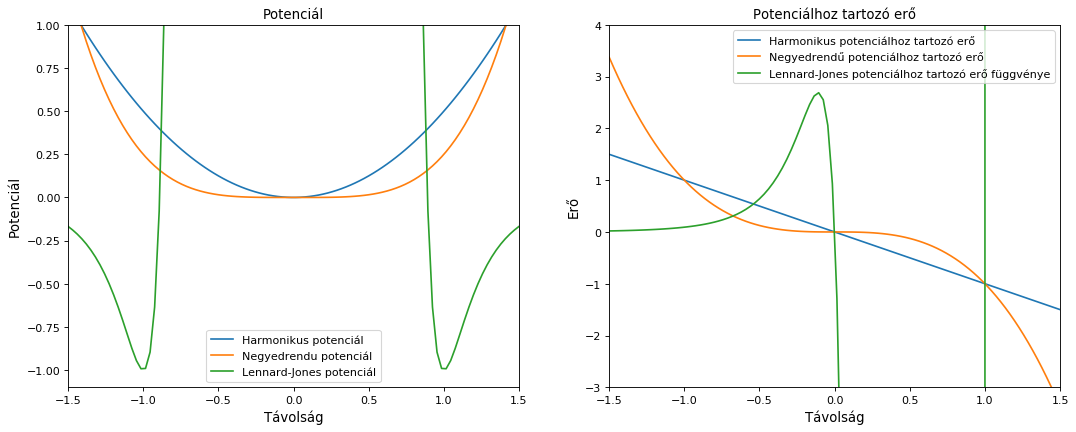

In [2]:
def harmonikus_pot(x, n, k = 1):
    x = np.linspace(x[0],x[1],n);
    yV = (1/2)*k*x**2;
    return x, yV

def harmonikus_pot2(x, k = 1):
    return (1/2)*k*x**2;

def harmonikus_ero(x, n, k = 1):
    x = np.linspace(x[0],x[1],n);
    yF = -k*x;
    return x, yF
    
def negyedrendu_pot(x, n, k = 1):
    x = np.linspace(x[0],x[1],n);
    yV = (1/4)*k*x**4;
    return x, yV

def negyedrendu_pot2(x, k = 1):
    return (1/4)*k*x**4;

def negyedrendu_ero(x, n, k = 1):
    x = np.linspace(x[0],x[1],n);
    yF = -k*x**3;
    return x, yF

def lennardjones_pot(x, n, x0 = 1, v0 = 1):
    x = np.linspace(x[0],x[1],n);
    yV = v0*(((x0/x)**12)-(2*(x0/x)**6));
    return x, yV

def lennardjones_pot2(x, x0 = 1, v0 = 1):
    return v0*(((x0/x)**12)-(2*(x0/x)**6));

def lennardjones_ero(x, n, x0 = 1, v0 = 1):
    x = np.linspace(x[0],x[1],n);
    yF = 12*v0*(((x0**12/(x-x0)**13))-(x0**6/(x-x0)**7));
    return x, yF
    
i= [-1.5, 1.5]

harmonikus_pot = harmonikus_pot(i, 100)
harmonikus_ero = harmonikus_ero(i, 100)
negyedrendu_pot = negyedrendu_pot(i, 100)
negyedrendu_ero = negyedrendu_ero(i, 100)
lennardjones_pot = lennardjones_pot(i, 100)
lennardjones_ero = lennardjones_ero(i, 100)

plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.title('Potenciál')  
plt.xlim(i[0],i[1])
plt.ylim(-1.1,1)
plt.plot(harmonikus_pot[0],harmonikus_pot[1], linestyle='-', label='Harmonikus potenciál')
plt.plot(negyedrendu_pot[0],negyedrendu_pot[1], linestyle='-', label='Negyedrendu potenciál')
plt.plot(lennardjones_pot[0],lennardjones_pot[1], linestyle='-', label="Lennard-Jones potenciál")
plt.xlabel('Távolság', fontsize = '12')
plt.ylabel('Potenciál', fontsize = '12')
plt.legend()
plt.subplot(1,2,2)
plt.title('Potenciálhoz tartozó erő')
plt.xlim(i[0],i[1])
plt.ylim(-3,4)
plt.plot(harmonikus_ero[0],harmonikus_ero[1], linestyle='-', label="Harmonikus potenciálhoz tartozó erő")
plt.plot(negyedrendu_ero[0],negyedrendu_ero[1], linestyle='-', label="Negyedrendű potenciálhoz tartozó erő")
plt.plot(lennardjones_pot[0],lennardjones_ero[1], linestyle='-', label="Lennard-Jones potenciálhoz tartozó erő függvénye")
plt.xlabel('Távolság', fontsize = '12')
plt.ylabel('Erő', fontsize = '12')
plt.legend()

### ToDo: Deriváltja hol nulla

## 3. feladat

Integráljuk a harmonikus és Lennard-Jones-potenciállal meghatározott oszcillátorok mozgásegyenletét egyszerű negyed rendű Runge-Kutta-módszerrel vagy a Dormand-Prince-féle 5(4)-ed rendű, adaptív lépéshossz-választásos módszerrel. Az integráláshoz használjunk szabadon elérhető programcsomagot, pl.:

* python: scipy.integrate.RK45
* octave: ode45
* C: GSL ODE csomag
* C++: Boost.Numeric.Odeint csomag

Ábrázoljuk az egyenlet változóinak időfejlődését, a teljes energiát és a lépéshosszt az idő függvényében!

rk45 = RK45(függvény, 
            t0 honnan indul integrálás, 
            y0 kezdeti értékek (vektor tuple, list,...), 
            meddig menjen az integrátor, 
            adjunk meg jo nagy számot)

In [3]:
import numpy as np
from scipy.integrate import RK45

In [4]:
def plot_rk45(t, y, title):
    
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
        
    plt.title(title, fontsize='14')
    plt.xlabel('Idő', fontsize='12')
    plt.ylabel('Potenciál', fontsize='12')
    plt.plot(t,y[:,0], label = "Mozgás")
    plt.legend(loc='upper right', fontsize='12')
    
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.title(title, fontsize='14')
    plt.xlabel('Idő', fontsize='12')
    plt.ylabel('Potenciál', fontsize='12')
    plt.plot(t,y[:,1], label = "Sebesség")
    plt.legend(loc='upper right', fontsize='12')
    
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.title(title, fontsize='14')
    plt.xlabel('Idő', fontsize='12')
    plt.ylabel('Potenciál', fontsize='12')
    plt.plot(t,y[:,2], label = "Energia")
    plt.legend(loc='upper right', fontsize='12')

#### Harmónikus oszcillátor

$$ F = -Dr $$
$F$ az erő, $D$ az ugynevezett direkciós állandó, $r$ egy vektor, ami pedig a kitérés.
$$ m \ddot r = -Dr $$
$$ \dot v = \frac{F}{m} $$

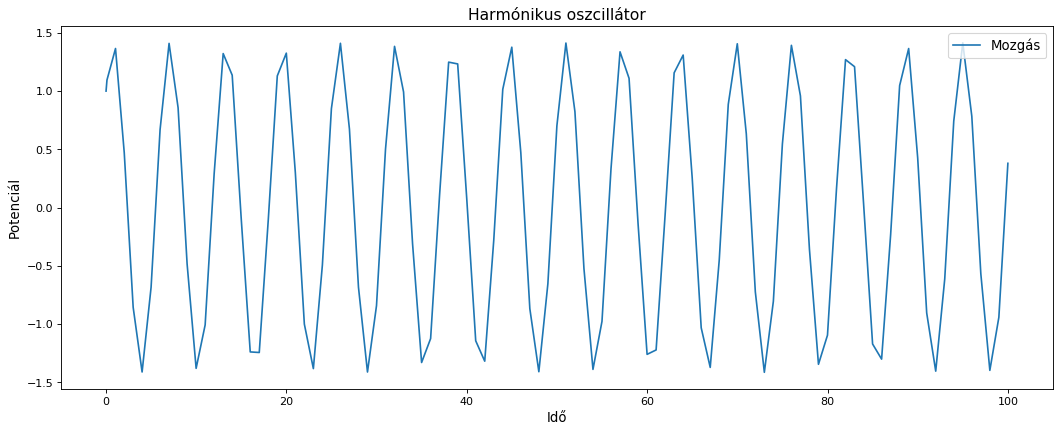

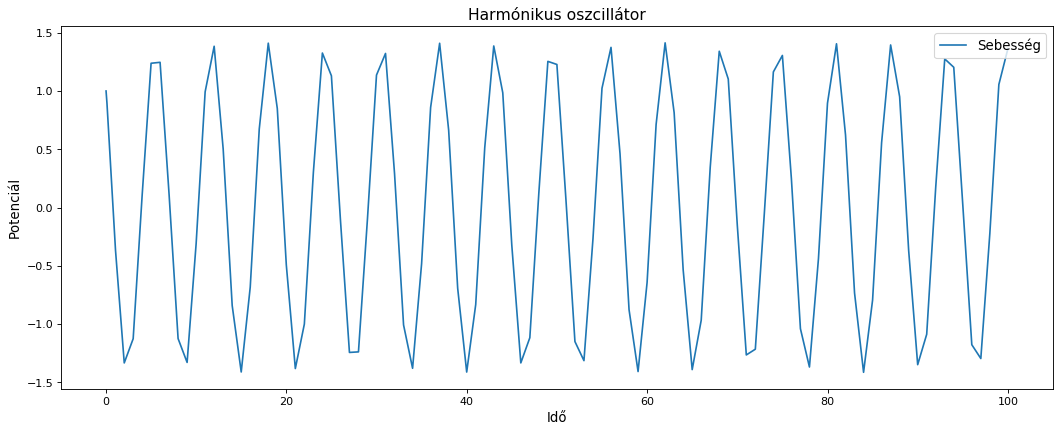

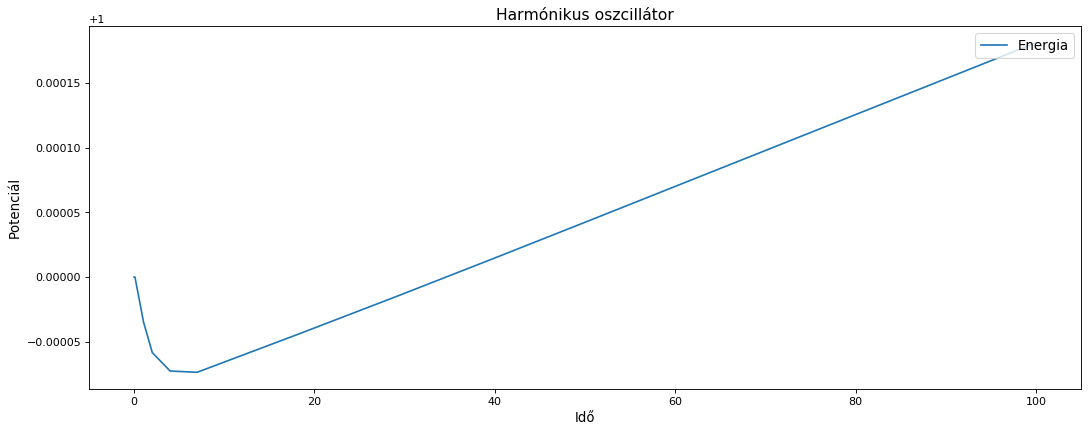

In [5]:
def harmonikus_rk45(n):
    def harmonikus_ero(t,y):
        x, m = 1, 1;
        dx = y[1];
        dv = -(y[0]/m);
        return dx, dv
    
    y0 = np.array([1, 1])

    ty = RK45(harmonikus_ero,0,y0, n);
    
    t, y = [], []
    
    while ty.t < n:
        t.append(ty.t)
        y.append(ty.y)
        ty.step()
        
    t, y = np.array(t), np.array(y)
    
    y = np.c_[ y, .5*y[:,1]**2+harmonikus_pot2(y[:, 0]) ] # adding full energy
    
    return t, y

harmonikus_rk45_t, harmonikus_rk45_y = harmonikus_rk45(100)

plot_rk45(harmonikus_rk45_t, harmonikus_rk45_y, 'Harmónikus oszcillátor')


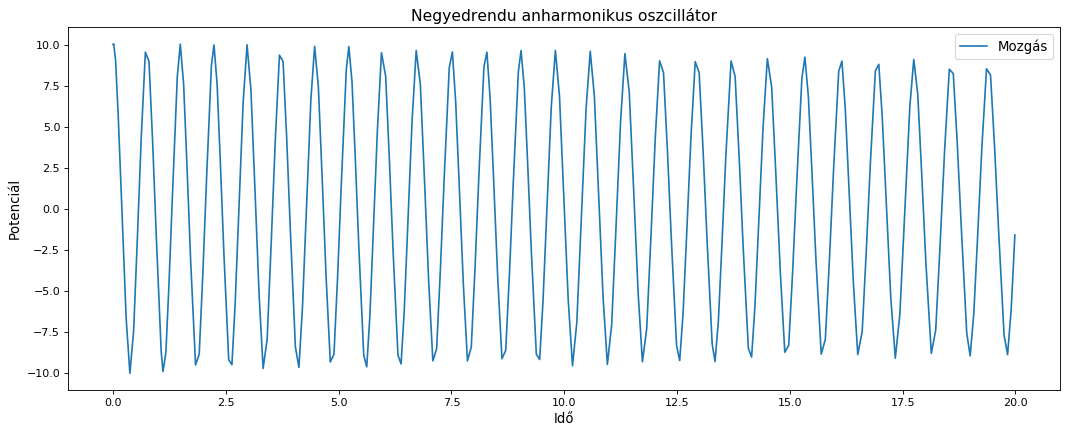

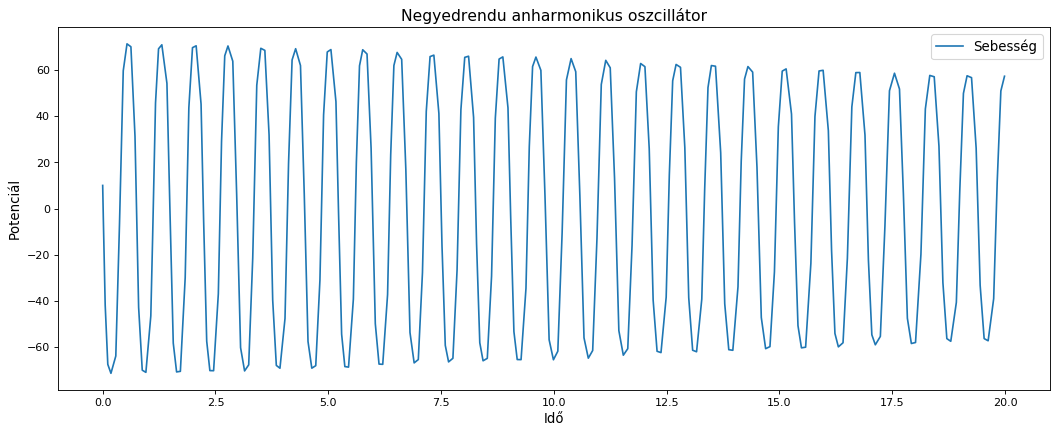

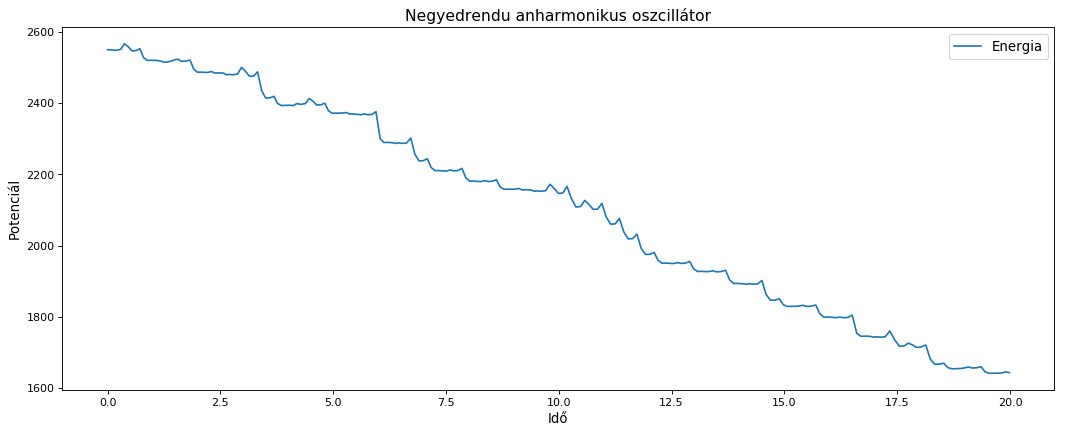

In [6]:
def negyedrendu_rk45(n):
    def negyedrendu_ero(t,y):
        x = 1;
        m = 1;
        dx = y[1];
        dv = -(y[0]**3/m);
        return dx, dv
    
    y0 = np.array([10, 10])

    ty = RK45(negyedrendu_ero,0,y0, 100);
    
    t, y = [], []
    
    while ty.t < n:
        t.append(ty.t)
        y.append(ty.y)
        ty.step()
        
    t, y = np.array(t), np.array(y)
    
    y = np.c_[ y, .5*y[:,1]**2+negyedrendu_pot2(y[:, 0]) ] # adding full energy
            
    return t, y

negyedrendu_rk45_t, negyedrendu_rk45_y = negyedrendu_rk45(20)

plot_rk45(negyedrendu_rk45_t, negyedrendu_rk45_y, 'Negyedrendu anharmonikus oszcillátor')

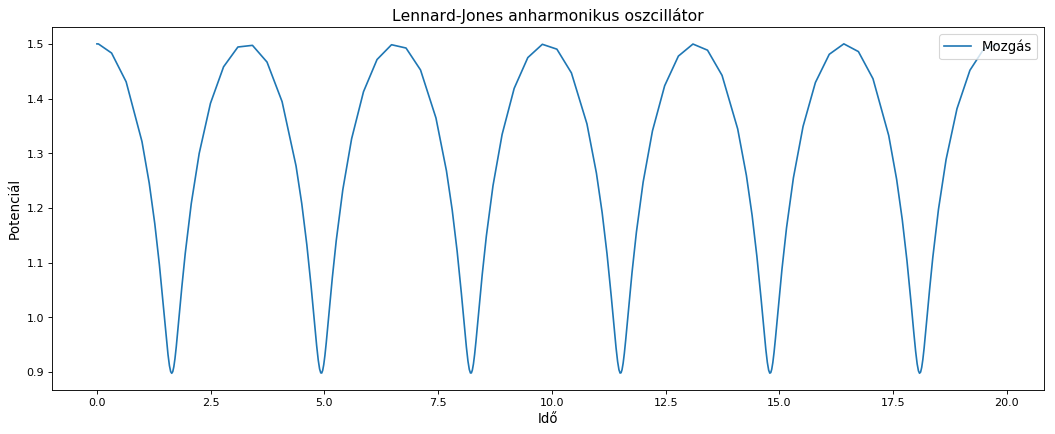

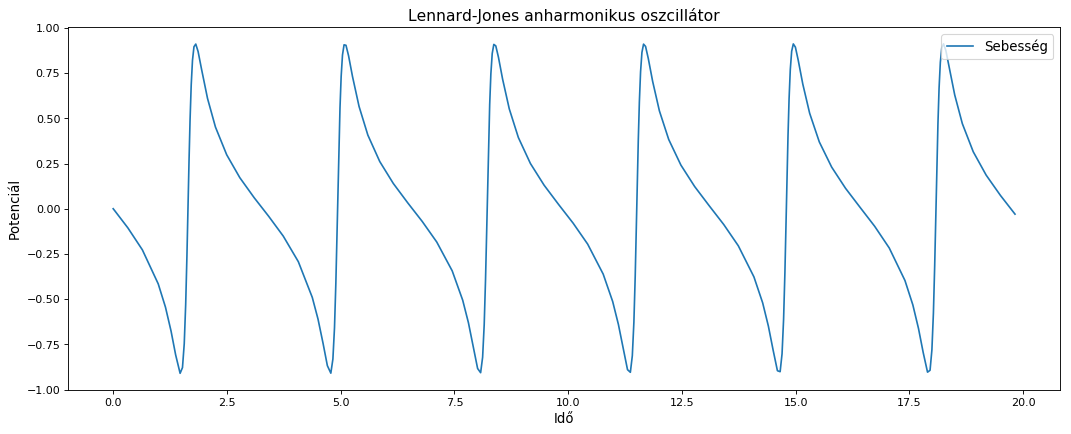

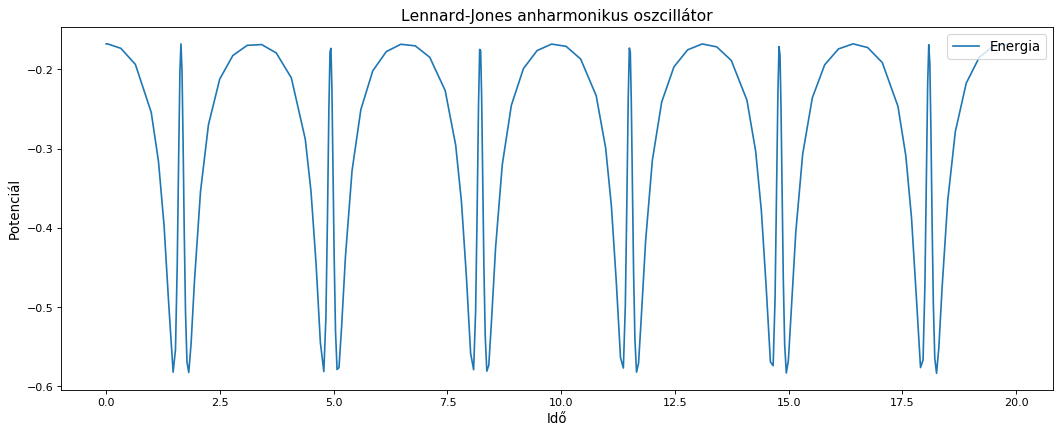

In [15]:
def lennardjones_rk45(n):
    def lennardjones_ero(t,y):
        x0 = 1;
        v0 = 1;
        m = 2;
        dx = y[1];
        dv = 12*v0*(((x0**12/y[0]**13)-(x0**6/y[0]**7))/m);
        return dx, dv
    
    y0 = np.array([1.5, 0])

    ty = RK45(lennardjones_ero,0,y0, 100, rtol=0.00001);
    
    t, y = [], []
    
    while ty.t < n:
        t.append(ty.t)
        y.append(ty.y)
        ty.step()
        
    t, y = np.array(t), np.array(y)
    
    y = np.c_[ y, .5*y[:,1]**2+lennardjones_pot2(y[:, 0]) ] # adding full energy
        
    return t, y

lennardjones_rk45_t, lennardjones_rk45_y = lennardjones_rk45(20)

plot_rk45(lennardjones_rk45_t, lennardjones_rk45_y, 'Lennard-Jones anharmonikus oszcillátor')

## 4. feladat

Interpoláljuk a 3. feladatból kapott megoldásokat időben egyenletes lépésközzel, lineárisan és köbös spline-ok segítségével!

In [8]:
from scipy.interpolate import interp1d

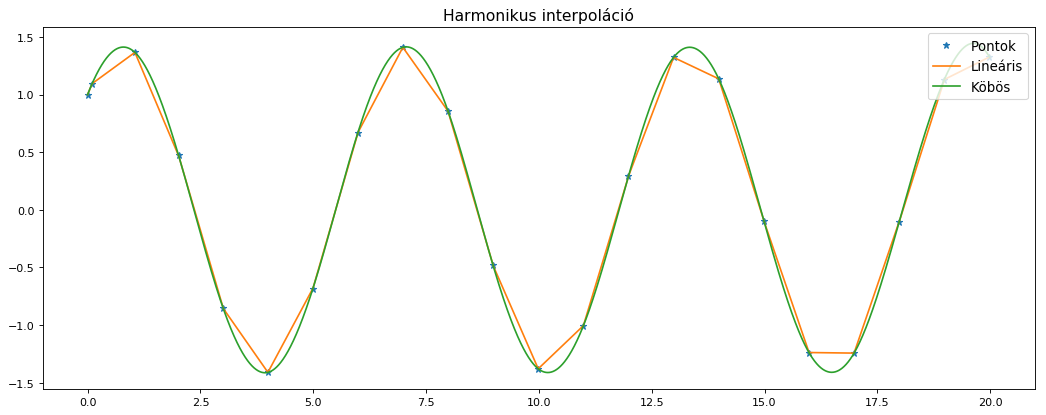

In [9]:
def harmonikus_interpolation(n):
    
    t, y = harmonikus_rk45(20)
    
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    
    #pontok
    plt.plot(t,y[:,0], '*', label = "Pontok")
    
    #lineáris 
    linear = interp1d(t,y[:,0] ,kind = 'linear')
    x = np.linspace(0,max(t),10000)
    plt.plot(x,linear(x), label="Lineáris")
    
    #köbös
    cubic = interp1d(t,y[:,0] ,kind = 'cubic')
    plt.plot(x,cubic(x), label="Köbös")
    
    plt.title("Harmonikus interpoláció", fontsize='14')
    plt.legend(loc='upper right', fontsize='12')

harmonikus_interpolation(10)

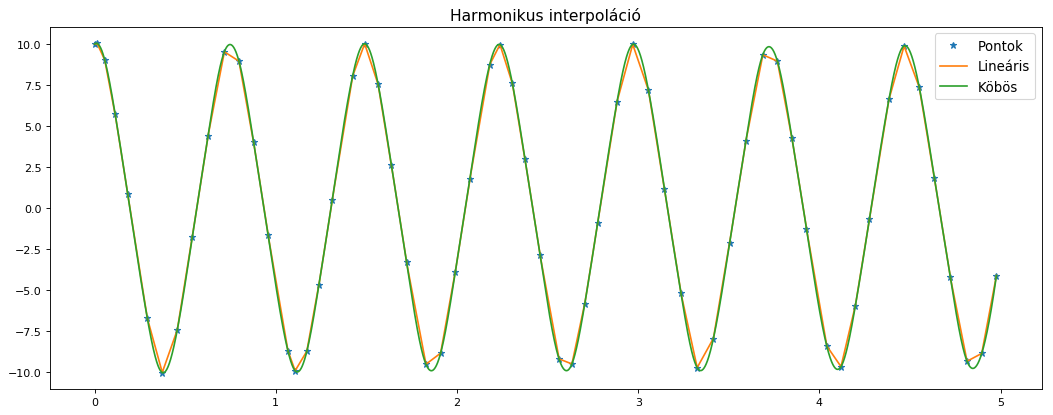

In [10]:
def negyedrendu_interpolation(n):
    
    t, y = negyedrendu_rk45(5)    
    
    plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
    
    #pontok
    plt.plot(t,y[:,0], '*', label = "Pontok")

    #lineáris 
    linear = interp1d(t,y[:,0] ,kind = 'linear')
    x = np.linspace(0,max(t),10000)
    plt.plot(x,linear(x), label="Lineáris")
    
    #köbös
    cubic = interp1d(t,y[:,0] ,kind = 'cubic')
    plt.plot(x,cubic(x), label="Köbös")
    
    plt.title("Harmonikus interpoláció", fontsize='14')
    plt.legend(loc='upper right', fontsize='12')

negyedrendu_interpolation(10)

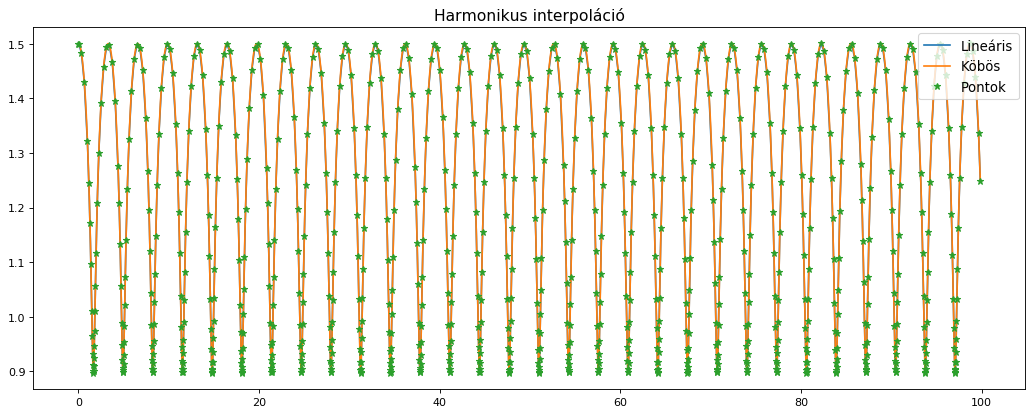

In [40]:
def lennardjones_interpolation(n):
    t, y = lennardjones_rk45(n)    
    linear = interp1d(t,y[:,0] ,kind = 'linear')
    cubic = interp1d(t,y[:,0] ,kind = 'cubic')
    return t, y, linear, cubic

t, y, linear, cubic = lennardjones_interpolation(100)
x = np.linspace(0,max(t),10000)

plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Harmonikus interpoláció", fontsize='14')
plt.plot(x,linear(x), label="Lineáris")
plt.plot(x,cubic(x), label="Köbös")
plt.plot(t,y[:,0], '*', label = "Pontok")
plt.legend(loc='upper right', fontsize='12')

## 5. feladat

Számítsuk ki, és ábrázoljuk a felprogramozott oszcillátorok Fourier-spektrumát. Mit figyelhetünk meg?

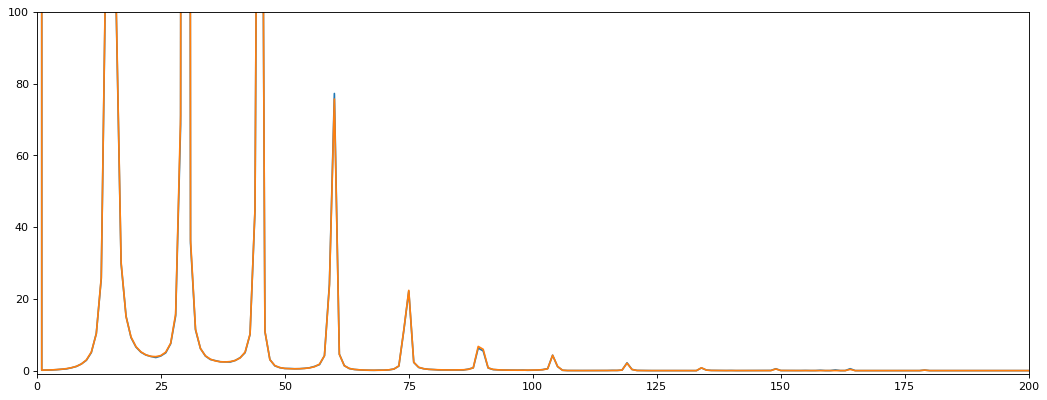

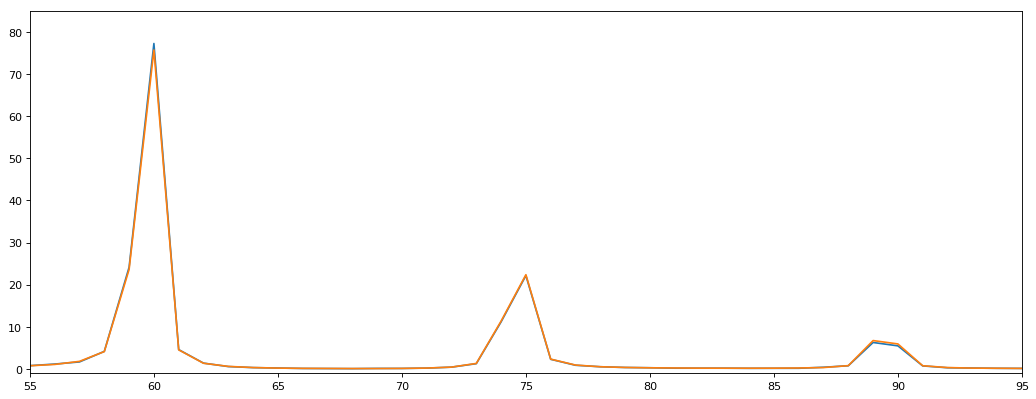

In [45]:
tt = np.linspace(1,50,1024)

fl = np.fft.rfft(linear(tt))
fc = np.fft.rfft(cubic(tt))

plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(0,200)
plt.ylim(-1,100)
plt.plot(abs(fl)**2)
plt.plot(abs(fc)**2)

plt.figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')
plt.xlim(55,95)
plt.ylim(-1,85)
plt.plot(abs(fl)**2)
plt.plot(abs(fc)**2)

## 6. feladat

Programozzunk be kaotikus oszcillátort!$^1$ Egy szinuszosan gerjesztett oszcillátor esetében a kaotikus viselkedés feltétele, hogy a visszatérítő erő ne lineáris függvénye legyen a kitérésnek. Ábrázoljuk a kitérés és a sebesség időfüggését, valamint a teljesítményspektrumot! Futassuk az integrálást legalább 1 millió lépésig, és ábrázoljuk a rendszer Poincaré-metszetét, azaz a sebességet a kitérés függvényében az $\omega t = n \cdot 2 \pi, n = 1, 2, 3, ... $ feltétel mellett!

$^1$ http://sprott.physics.wisc.edu/pubs/paper265.pdf